# DL

## DL_Classifier
Dataset : seeds_dataset.txt

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# 파일 경로 설정
file_path = "C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/seeds_dataset.txt"

# 데이터를 DataFrame으로 읽기
df = pd.read_csv(file_path, header=None, dtype={'column_index': 'category'})

# 데이터 확인
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
# 범주형 데이터를 숫자로 인코딩하기
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = [0,1,2,3,4,5,6]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# 데이터 확인
print(df)

      0  1  2  3  4  5  6
0     3  3  0  0  2  1  2
1     3  3  0  0  2  2  2
2     3  3  0  0  2  0  2
3     3  3  0  0  1  1  2
4     3  3  0  0  1  2  2
...  .. .. .. .. .. .. ..
1723  1  1  3  2  1  2  1
1724  1  1  3  2  1  0  3
1725  1  1  3  2  0  1  2
1726  1  1  3  2  0  2  1
1727  1  1  3  2  0  0  3

[1728 rows x 7 columns]


In [4]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [5]:
df[6].value_counts()

6
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [7]:
df_subject = df[6].unique()
print(df_subject)

[2 0 3 1]


In [8]:
X=df.drop(6,axis=1)
X.head()

,0,1,2,3,4,5
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [9]:
y = df[6]
y_counts = y.value_counts().sort_index()
print(y_counts)

6
0     384
1      69
2    1210
3      65
Name: count, dtype: int64


In [10]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: 6, dtype: int32

In [11]:
Y = pd.get_dummies(y).values

In [12]:
X = X.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,)

In [17]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [25]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

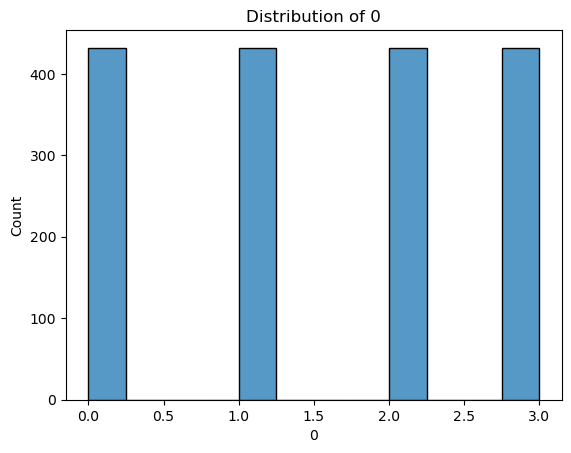

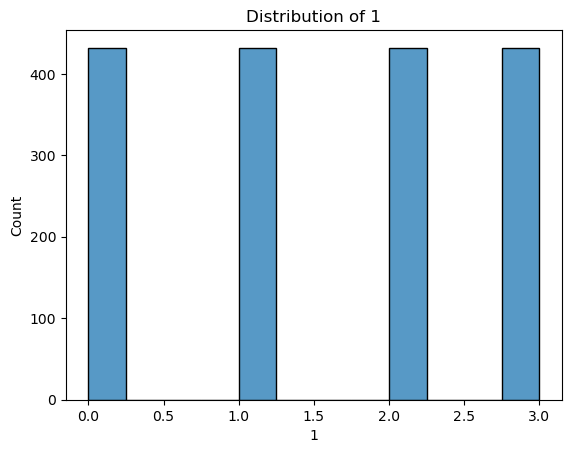

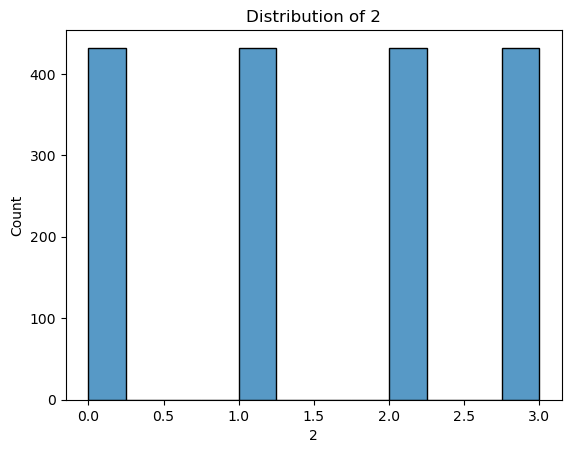

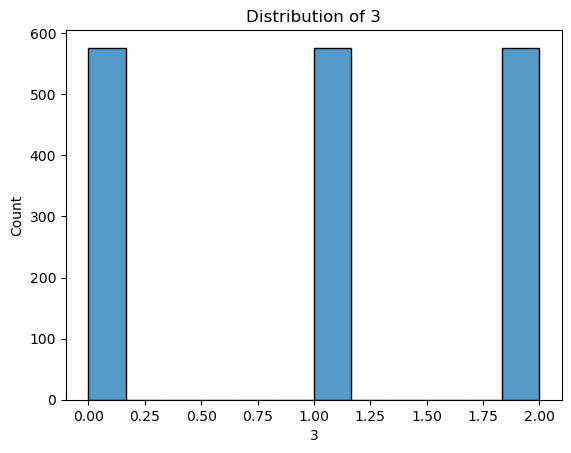

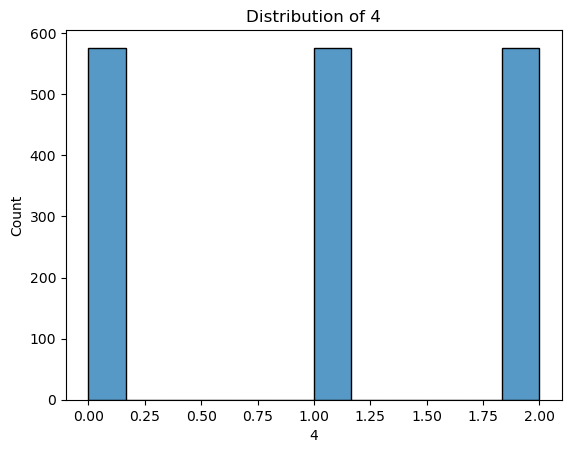

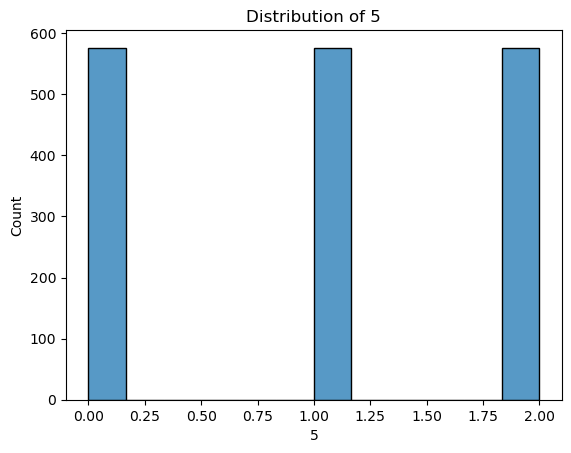

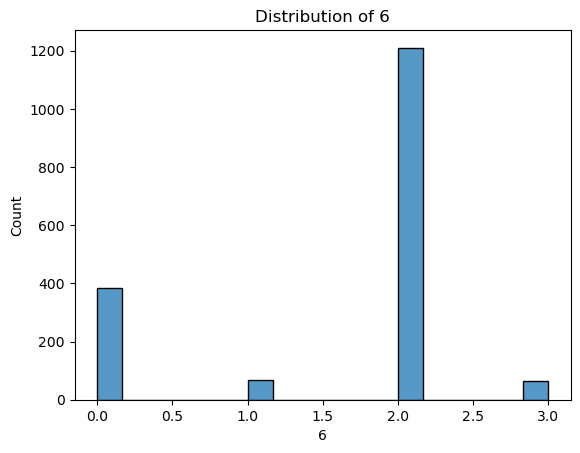

In [26]:
# 레이블 분포(Labeling Distribution): 각 클래스의 분포 확인
for column in df.columns:
    if df[column].dtype != 'object':
        sns.histplot(df[column])
        plt.title(f'Distribution of {column}')
        plt.show()

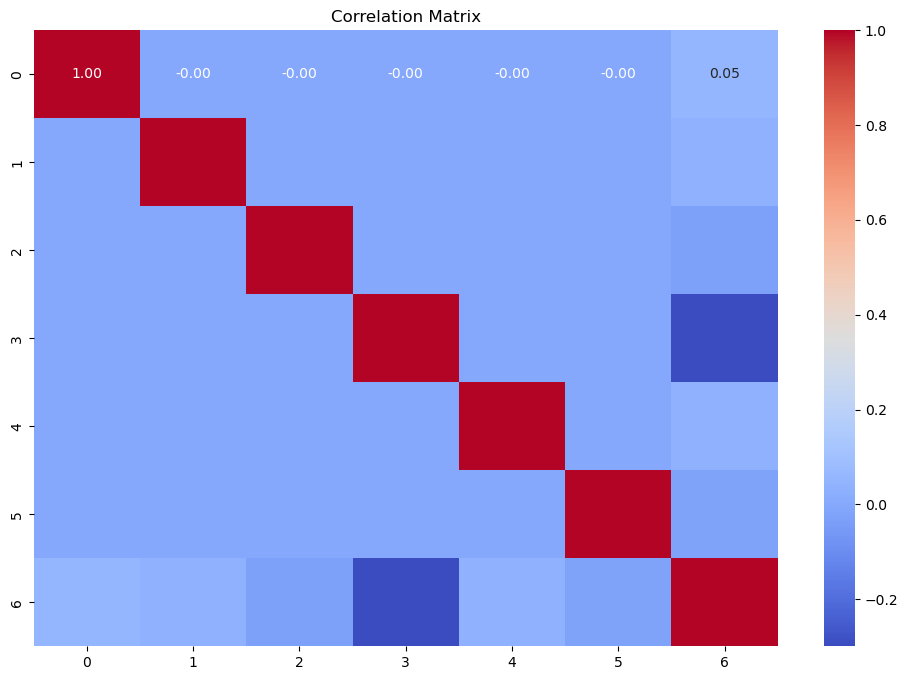

In [27]:
# 상관관계(Corelation): 변수 간의 상관관계 확인
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1382, 6), (1382, 4), (346, 6), (346, 4))

In [19]:
X_train.shape[1]

6

In [21]:
#모델 정의
model = Sequential()

model.add(Dense(128,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_split=0.1)

# 모델 예측
y_pred = model.predict(X_test)

# 클래스 예측
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               896       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 11,364
Trainable params: 11,364
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
39/39 [==============================] - 1s 9ms/step - loss: 0.8926 - accuracy: 0.6798 - val_loss: 0.7883 - val_accuracy: 0.7194
Epoch 2/30
39/39 [========================

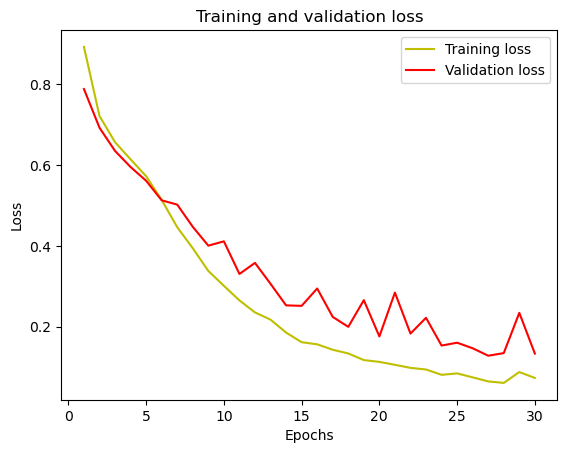

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

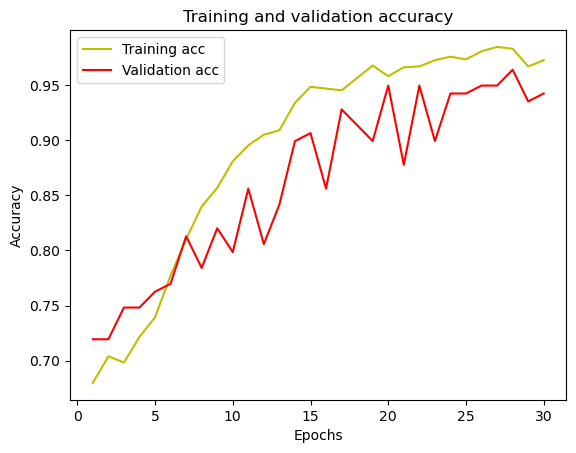

In [23]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        75
           1       0.78      0.54      0.64        13
           2       0.99      0.98      0.99       243
           3       0.71      1.00      0.83        15

    accuracy                           0.95       346
   macro avg       0.85      0.86      0.84       346
weighted avg       0.95      0.95      0.95       346

[[ 68   1   3   3]
 [  3   7   0   3]
 [  3   1 239   0]
 [  0   0   0  15]]
